<a href="https://colab.research.google.com/github/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/Sklearn_classificacao_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook de estudos de classificação de dados utilizando Sklearn, utilizado como fonte de dados e do conteúdo: https://dadosaocubo.com/classificacao-com-scikit-learn/ e também de https://github.com/ronaldolagepessoa/machine-learning/blob/master/classification_01.ipynb

Conforme já abordei em outros notebooks o conceito teórico da classficação, nesse realizaremos de forma prática uma análise de classificação, o banco de dados a ser utilizado.

# O que é classificação?

De forma breve, a classificação faz parte dos métodos de aprendizado de máquina supervisionado onde buscamos prever classes para um conjunto de dados, fornecendo assim variáveis discretar de saída (y), sendo norteadas pelas de dentrada (X).

Exemplo: Temos fotos de gatos e cachorros(X) e queremos que o algorítmo nos diga se a foto corresponde a um gato ou cachorro(y).

# Tipos de classificadores:

> **Classficador LAZY** (Preguiçoso): Basicamente são classficadores que decoram os dados e realizam o processamento somente no momento da previsão;

> **Classificadores EAGER** (Pró-ativos): Aprendem a classificar com os dados de treino e somente tomam a decisão na previsão (Processamento dos dados ocorre no treino).

# Classificador KNN (k-nearest neighbors)

O classificador KNN faz parte do conjunto de classificadores Lazy. Este, utiliza medidas de distância entre os pontos já classificados e o ponto a ser classificado para teterminar a classe do mesmo, onde o parâmetro conhecido como tamanho da vizinhança estabelece o númmero de pontos próximos considerados

In [ ]:
# Instalar as bibliotecas:
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
# Banco de dados perfeitamente distribuido entre os tipos de flor iris
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# Sobre o banco de dados utilizado:

Estamos utilizando um conjunto de dados denominado "Iris" presente na biblioteca seaborn, ele contem dados aonde poderemos prever a espécie do flor iris

<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.TVKg942fOsNbD33Cxz0VFAHaEo%26pid%3DApi&f=1&ipt=54156d45b34689b254a7e95d903b5a30f4cc986097fe31753d821e8a41ff1c18&ipo=images' width='250'>

------------------------------------------------------------


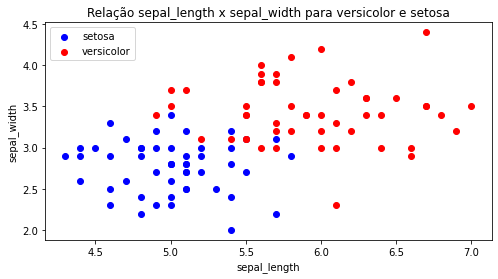

------------------------------------------------------------


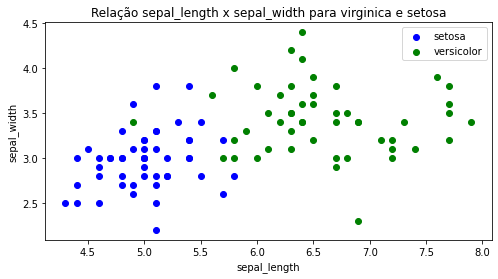

------------------------------------------------------------


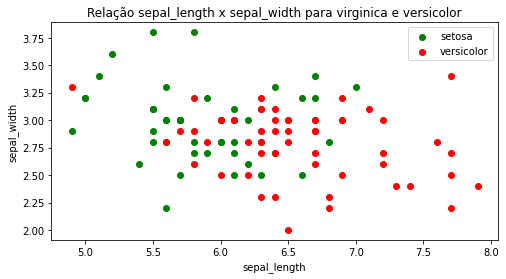

In [29]:
# Breve visualização para termos uma ideia de dispersão dos dados

print('------'*10)
plt.figure(figsize=(8, 4))
plt.scatter(df[df.species == 'setosa'].sepal_length, df[df.species == 'versicolor'].sepal_width, c='blue')
plt.scatter(df[df.species == 'versicolor'].sepal_length, df[df.species == 'setosa'].sepal_width, c='red')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(['setosa', 'versicolor'])
plt.title('Relação sepal_length x sepal_width para versicolor e setosa')
plt.show()
print('------'*10)
plt.figure(figsize=(8, 4))
plt.scatter(df[df.species == 'setosa'].sepal_length, df[df.species == 'virginica'].sepal_width, c='blue')
plt.scatter(df[df.species == 'virginica'].sepal_length, df[df.species == 'setosa'].sepal_width, c='green')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(['setosa', 'versicolor'])
plt.title('Relação sepal_length x sepal_width para virginica e setosa')
plt.show()
print('------'*10)
plt.figure(figsize=(8, 4))
plt.scatter(df[df.species == 'versicolor'].sepal_length, df[df.species == 'virginica'].sepal_width, c='green')
plt.scatter(df[df.species == 'virginica'].sepal_length, df[df.species == 'versicolor'].sepal_width, c='red')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(['setosa', 'versicolor'])
plt.title('Relação sepal_length x sepal_width para virginica e versicolor')
plt.show()

# Separando inputs e outputs

**Variável X** receberá banco de dados inteiro exceto coluna espécie/species

**Variável y ** receberá somente coluna espécie/species


In [31]:
X = df.drop('species', axis=1)
y = df.species

# Pré processando inputs

As variáveis presente no banco de dados precisam passar por um balanceamento de range's denominado "Z-Score"

Z-Score formula: z = (x – μ)/σ

basicamente estamos Normalizando todo o banco de dados para ficarem em escala 0 a 1, nosso objetivo com isso é uma maior acurária do classificador.

> Classe **MixMaxScaler** extraída de *sklearn.preprocessing* para realização da normalização dos dados.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X)
X_norm

# Realizando classificação

Da biblioteca Sklearn utilizaremos:

> Classe **KNeighborsClassifier** extraída de *sklearn.neighbors* para realização da classificação dos dados.

> Função train_teste_split extraída de *sklearn.model_selection* para a separação do banco de dados train e test.

> Função **accuracy_score** extraída de *sklearn.metrics* para encontrar a acurácia do modelo.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

accuracy_score(y_test, knn.predict(X_test))

0.98

# Nossa acurária alcançada foi de 98%!





# Mas e se não tivessemos padronizado nossos dados com o normalizador/Z-Score?

Iremos trocar o X_norm pelo X.

Simulando abaixo, vemos que o percentual de precisão seria também de 98%, ou seja, nesse caso a normalização não aumento a nossa eficácia.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train, y_train)

accuracy_score(y_test, knn2.predict(X_test))

0.98